# **1. Data Loading & Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/OnlineRetail.csv'


In [ ]:
# Adjust the path to your file location in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/OnlineRetail.csv'

# Load the CSV file
df = pd.read_csv(file_path, encoding='ISO-8859-1')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')
sns.set(font_scale=1.1)


In [ ]:

df.head()


df.info()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:

df = df.dropna(subset=['CustomerID'])

df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')

# **2. Plotting**

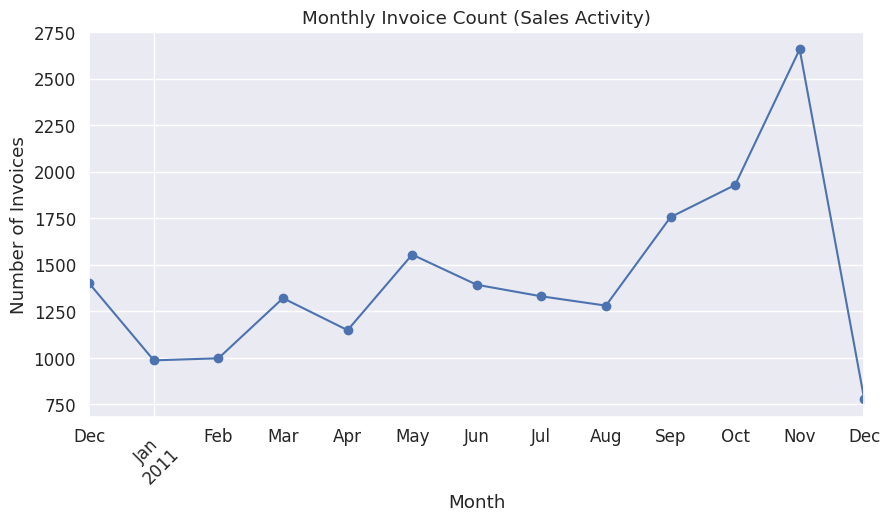

In [ ]:
monthly_sales = df.groupby('InvoiceYearMonth')['InvoiceNo'].nunique()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Invoice Count (Sales Activity)")
plt.ylabel("Number of Invoices")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-13-dd553d2043a5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


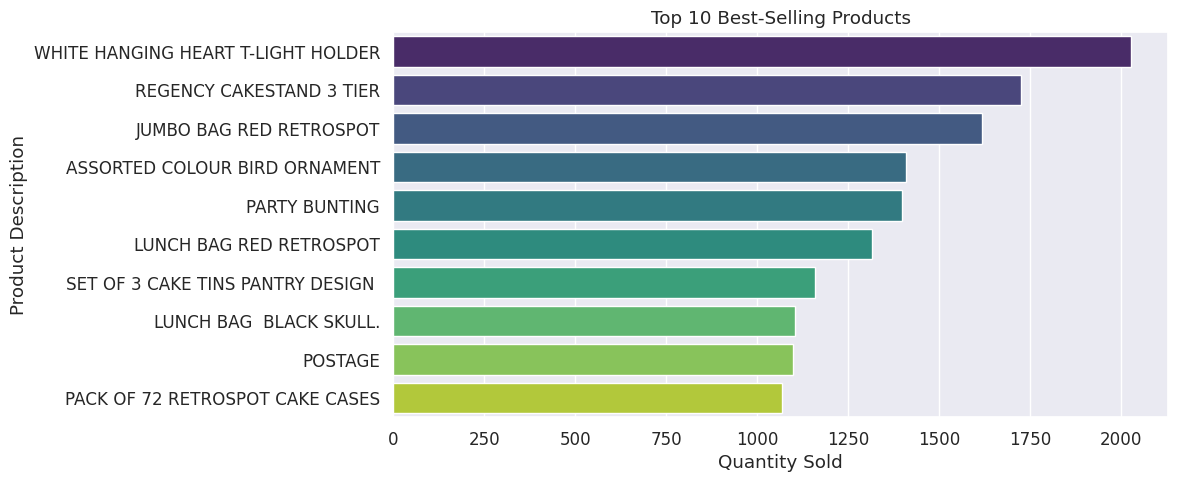

In [ ]:
top_products = df['Description'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Description")
plt.show()


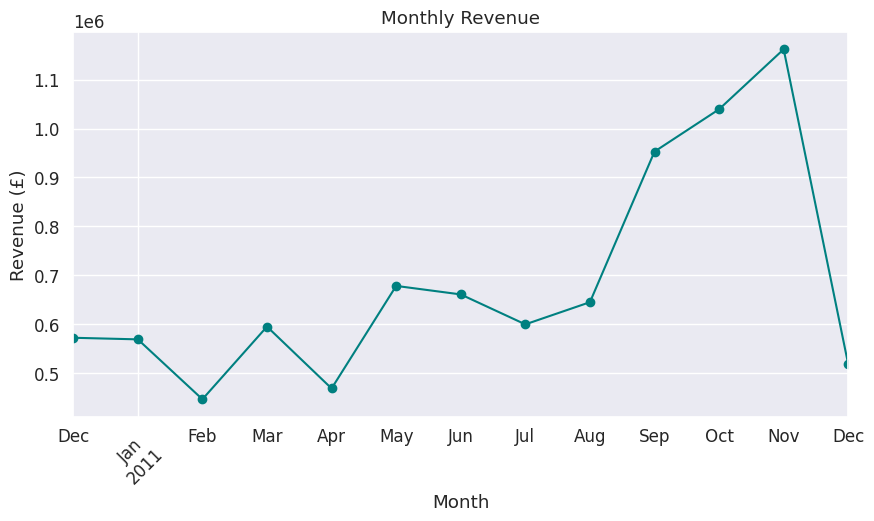

In [ ]:
# Create a new column: TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Monthly revenue
monthly_revenue = df.groupby('InvoiceYearMonth')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot(marker='o', color='teal')
plt.title("Monthly Revenue")
plt.ylabel("Revenue (£)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-15-9484d9e9ac9c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="rocket")


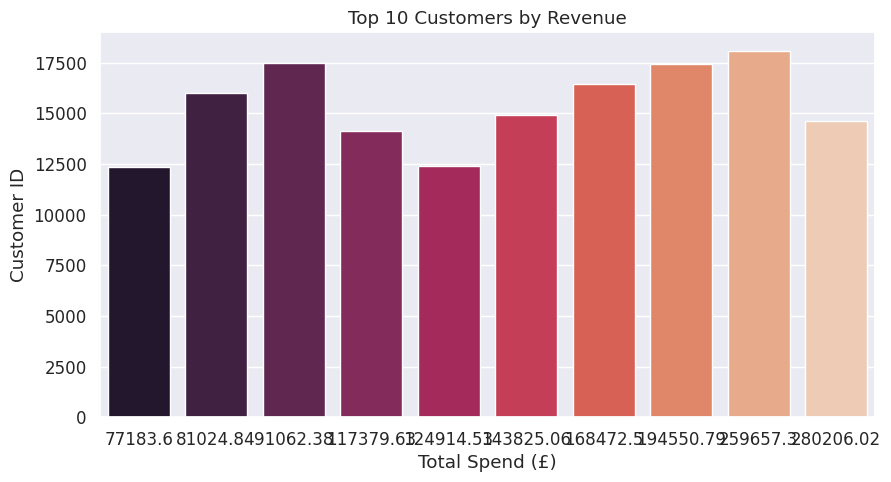

In [ ]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="rocket")
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Spend (£)")
plt.ylabel("Customer ID")
plt.show()


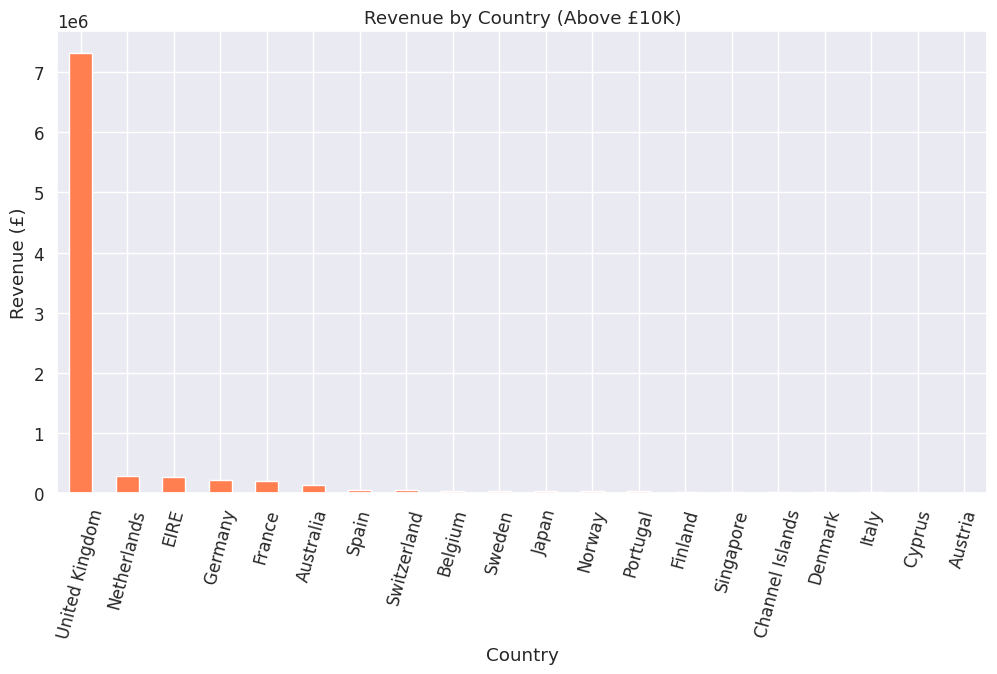

In [ ]:
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
top_countries = country_revenue[country_revenue > 10000]  # filter small ones

plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color='coral')
plt.title("Revenue by Country (Above £10K)")
plt.ylabel("Revenue (£)")
plt.xticks(rotation=75)
plt.grid(True)
plt.show()


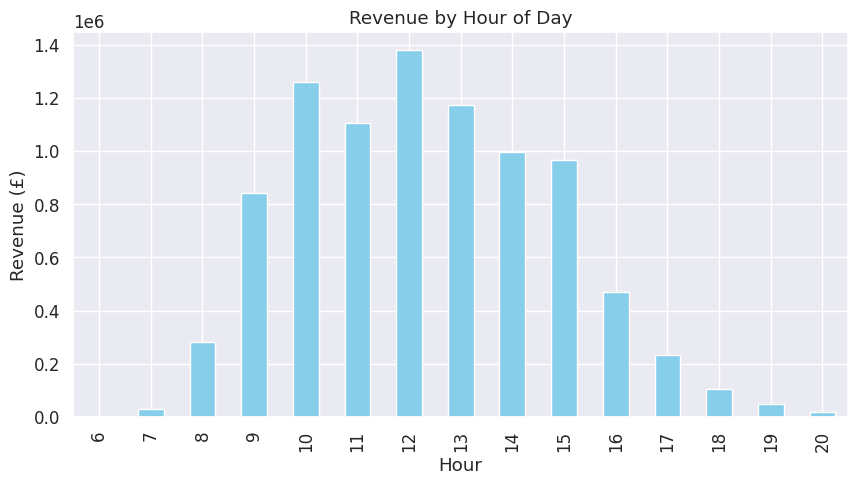

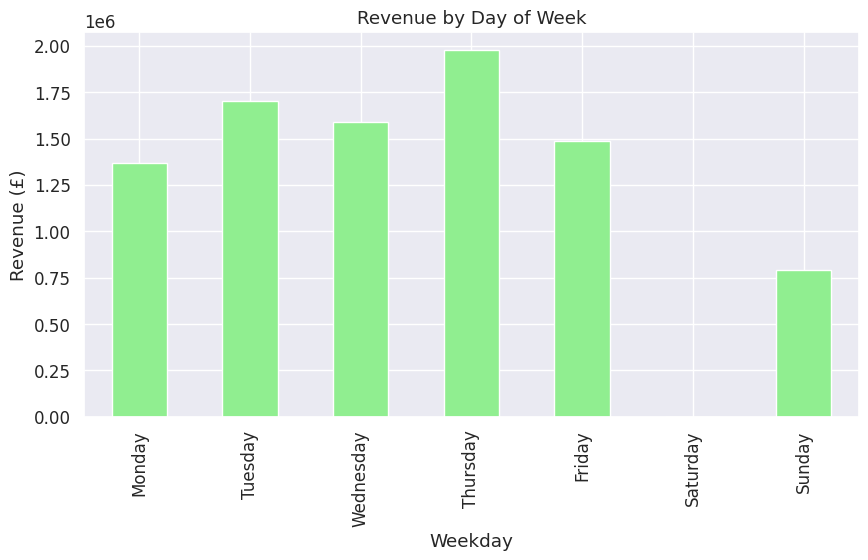

In [ ]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.day_name()

# Sales by hour
plt.figure(figsize=(10,5))
df.groupby('Hour')['TotalPrice'].sum().plot(kind='bar', color='skyblue')
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Revenue (£)")
plt.grid(True)
plt.show()

# Sales by weekday
plt.figure(figsize=(10,5))
df.groupby('Weekday')['TotalPrice'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar', color='lightgreen')
plt.title("Revenue by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Revenue (£)")
plt.grid(True)
plt.show()


In [ ]:
import datetime as dt

# Reference point for "recency"
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


# **3. RFM Analysis & KMeans & Visualization**

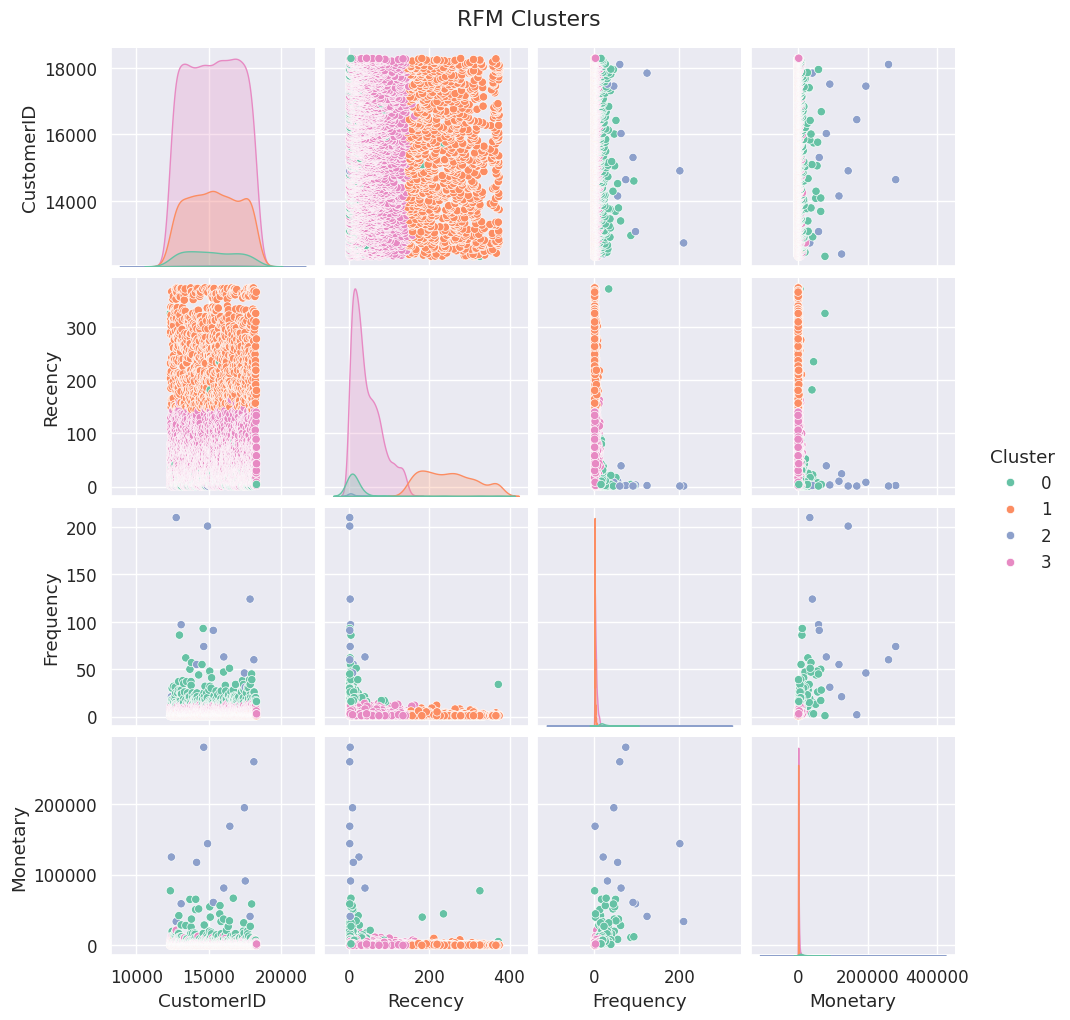

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Run K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualize clusters
sns.pairplot(rfm.reset_index(), hue='Cluster', palette='Set2')
plt.suptitle("RFM Clusters", y=1.02)
plt.show()


<Axes: ylabel='Cluster'>

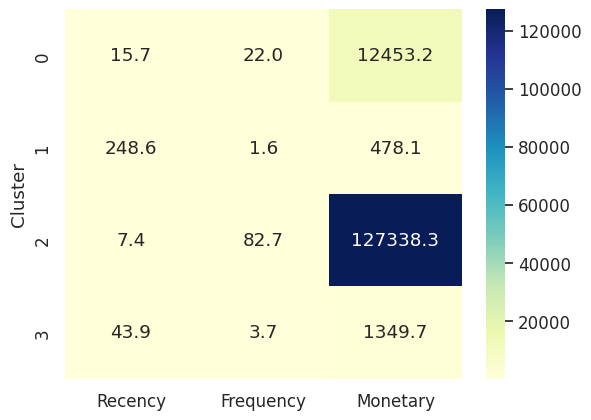

In [ ]:
      import seaborn as sns
sns.heatmap(rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean(), annot=True, fmt='.1f', cmap='YlGnBu')


# 🔵 Cluster 2: VIP Customer
- **Recency**: Very low (they purchased recently)  
- **Frequency**: Very High  
- **Monetary**: Very high spending  

**Interpretation**:  
These are your most loyal and valuable customers. They buy frequently, spend a lot, and made recent purchases.  

**📌 Suggested Strategy**:  
Offer loyalty programs, exclusive deals, or early product access to retain and reward them. ####

# 🟡 Cluster 1: At Risk
- **Recency**: Very High (haven’t purchased in a long time)  
- **Frequency**: Very Low  
- **Monetary**: Very Low  

**Interpretation**:  
These customers used to shop but haven't returned in a while. They are at risk of churning.  

**📌 Suggested Strategy**:  
Use re-engagement campaigns such as discount offers, win-back emails, or customer feedback surveys.

### 🟢 Cluster 0: New or Potential Customers

- **Recency**: Low (recent purchase)  
- **Frequency**: Low  
- **Monetary**: High but less than Cluster 2  

**Interpretation**:  
These are new or first-time buyers. They’ve made one recent purchase and haven’t built loyalty yet.  

**📌 Suggested Strategy**:  
Send welcome emails, onboarding sequences, and incentives for second purchases to nurture retention.

### 🔴 Cluster 3: Low Value Customers
- **Recency**: High  
- **Frequency**: Low  
- **Monetary**:  Low  

**Interpretation**:  
These customers rarely engage and haven’t bought in a long time. Their contribution to revenue is minimal.  

**📌 Suggested Strategy**:  
Apply low-cost marketing or deprioritize them. Focus your main campaigns on higher-value segments.


Text(0.5, 0.92, '3D Cluster Visualization (RFM)')

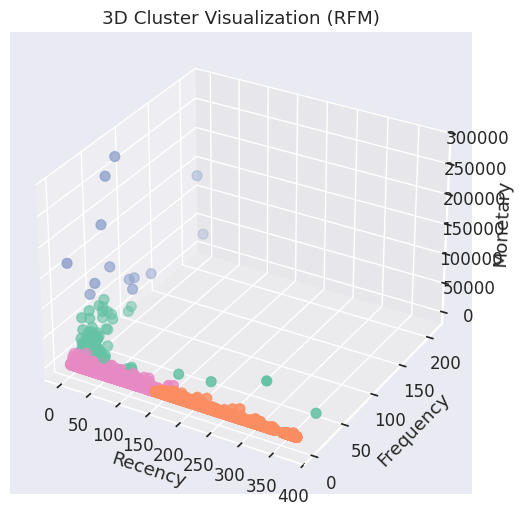

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


palette = sns.color_palette("Set2", rfm['Cluster'].nunique())
cluster_colors = rfm['Cluster'].map(dict(zip(sorted(rfm['Cluster'].unique()), palette)))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    rfm['Monetary'],
    c=cluster_colors,
    s=50
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Cluster Visualization (RFM)')


# **5. Machine Learning – Predicting Segment**

In [ ]:
from sklearn.model_selection import train_test_split

X = rfm_scaled  # Scaled RFM values
y = rfm['Cluster']  # Cluster labels from KMeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
NameError: name 'model' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 44   0   1   0]
 [  0 215   0   2]
 [  0   0   2   0]
 [  1   0   0 603]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       1.00      0.99      1.00       217
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00       604

    accuracy                           1.00       868
   macro avg       0.91      0.99      0.94       868
weighted avg       1.00      1.00      1.00       868



<ipython-input-46-498c2493da65>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


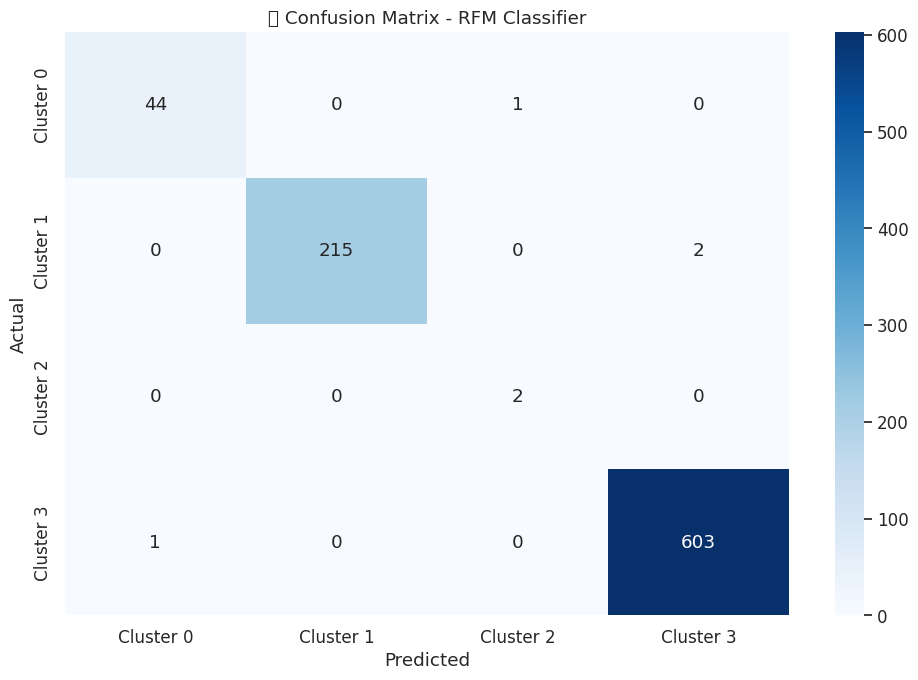

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Define class labels (e.g., Cluster 0, 1, 2...)
labels = [f"Cluster {i}" for i in sorted(rfm['Cluster'].unique())]

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('📊 Confusion Matrix - RFM Classifier')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Feature Importance')

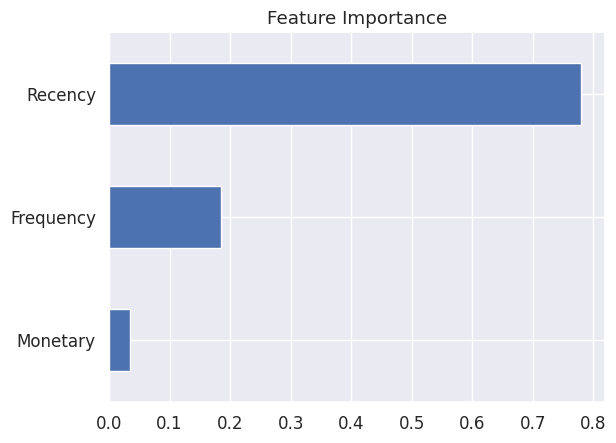

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

features = ['Recency', 'Frequency', 'Monetary']
importances = clf.feature_importances_

pd.Series(importances, index=features).sort_values().plot(kind='barh')
plt.title('Feature Importance')


In [ ]:
import pandas as pd

# Define the new customer as a DataFrame with matching column names
new_customer = pd.DataFrame({
    'Recency': [20],
    'Frequency': [5],
    'Monetary': [300]
})

# Apply the same scaler
new_scaled = scaler.transform(new_customer)

# Predict
predicted_cluster = clf.predict(new_scaled)
print("Predicted Segment (Cluster):", predicted_cluster[0])



Predicted Segment (Cluster): 3


In [ ]:
# Example: long time no shop, low spend
test = pd.DataFrame({'Recency': [300], 'Frequency': [1], 'Monetary': [50]})
print("Cluster:", clf.predict(scaler.transform(test))[0])

# Example: very frequent, moderate spender
test = pd.DataFrame({'Recency': [15], 'Frequency': [10], 'Monetary': [400]})
print("Clustimport joblib

# Modeli kaydet
joblib.dump(model, "rfm_classifier.pkl")

# Scaler'ı kaydet
joblib.dump(scaler, "rfm_scaler.pkl")
er:", clf.predict(scaler.transform(test))[0])

# Example: very frequent shop, high spend
test = pd.DataFrame({'Recency': [1], 'Frequency': [150000], 'Monetary': [500000]})
print("Cluster:", clf.predict(scaler.transform(test))[0])

# Example: very frequent, moderate spender
test = pd.DataFrame({'Recency': [10], 'Frequency': [16], 'Monetary': [1000]})
print("Cluster:", clf.predict(scaler.transform(test))[0])


Cluster: 1
Cluster: 3
Cluster: 2
Cluster: 0


In [1]:
import joblib

# Modeli kaydet
joblib.dump(model, "rfm_classifier.pkl")

# Scaler'ı kaydet
joblib.dump(scaler, "rfm_scaler.pkl")


NameError: name 'model' is not defined